In [3]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
import os
import random
import glob
def imshow(x):
    x = img.imread(x)
    plt.imshow(x)
    plt.show()
    
def imcrop(x):
    name = x.split('/')
    name[-2]='t_50_back'
    save_name = '/'.join(name)
#     print(name)
#     print(save_name)
    x = Image.open(x)
    x = x.crop((0,10,1116,1080))
    x = x.resize((224,224))
    x.save(save_name)
#     plt.imshow(x)
#     plt.show()

def imsave(x,i,y):
    x = Image.open(x)
    x.save(os.path.join(y,str(i)+'.jpg'))

In [4]:
t100 = '/media/data2/rjsdn/zoom/t_50/'
imgs = [t100+x for x in os.listdir(t100)]
for img in imgs:
    imcrop(img)

In [12]:
path = '/media/data2/FaceForensics_Dec2020/Few-Shot_GAN/data/frame_data'
path_r ='/home/rjsdn/zoom_real'
fake=[ y for x in os.walk(path) 
                for y in glob.glob(os.path.join(x[0], '*.jpg')) ]        
real = [os.path.join(path_r,x) for x in os.listdir(path_r)]
random.shuffle(fake)
print(len(real))
print(len(fake))
# print(real[0])

# for i in range(10):
#     imshow(fake[i])
    
# for i in range(10):
#     imshow(real[i])

1261
73559


In [13]:
for x in tqdm(fake):
    imcrop(x)


100%|██████████| 73559/73559 [32:16<00:00, 37.98it/s]


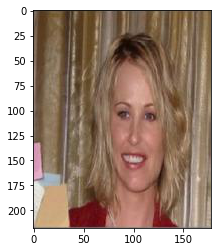

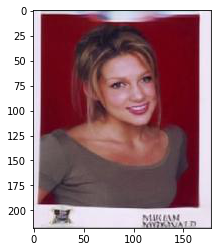

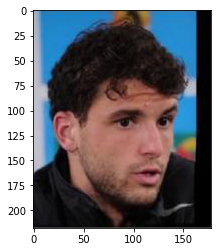

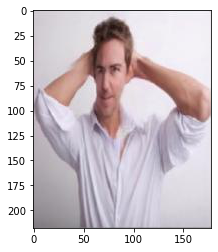

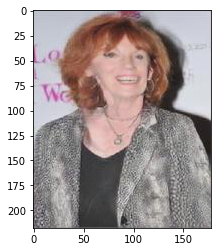

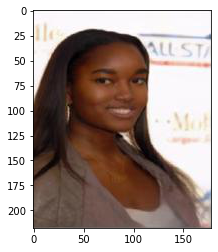

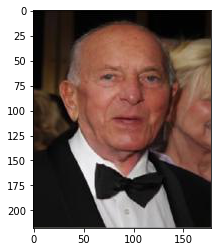

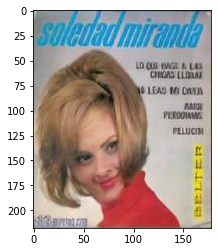

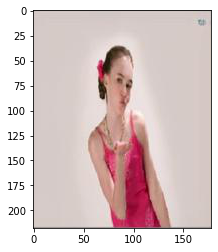

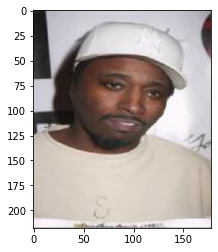

In [18]:
path1 = '/media/data2/rjsdn/same_size'
fake2=[ y for x in os.walk(path1) 
                for y in glob.glob(os.path.join(x[0], '*.jpg')) ]  
random.shuffle(fake2)
for i in range(10):
    imshow(fake2[i])

In [2]:
p_dataset = '/media/data2/rjsdn/zoom/data/dataset'
data = '/media/data2/rjsdn/same_size'

cnt=0
dir_cnt=0
for x in tqdm(os.listdir(data)):
    p = os.path.join(data,x)
    for y in os.listdir(p):
        pp = os.path.join(p,y)
        for z in os.listdir(pp):
            data_name = os.path.join(pp,z)
            seg = data_name.split('/')
            if seg[-1] <= '00020.jpg' or seg[-1]>'00061.jpg':
                continue
            if dir_cnt < 900:
                imsave(data_name,cnt,p_dataset+'/train/1')
            else:
                imsave(data_name,cnt,p_dataset+'/test/1')
            cnt+=1
            
    dir_cnt+=1

# for x in tqdm(fake2):
#     seg = x.split('/')
#     if seg[-1] <= '00010.jpg' and seg[-1]>'00061.jpg':
#         continue
#     if cnt < 50000:
#         imsave(x,cnt,data+'/train/1')
#     else:
#         imsave(x,cnt,data+'/test/1')
#     cnt+=1
    


100%|██████████| 952/952 [01:02<00:00, 15.20it/s]


In [4]:
real = '/media/data2/rjsdn/zoom/data/1_dataset/train/0'
cnt=0
real_list = os.listdir(real)
random.shuffle(real_list)
# print(len(real_list))
for x in tqdm(real_list):
    xx = os.path.join(real,x)
    if cnt<28421:
        imsave(xx,cnt,p_dataset+'/train/0')
    else:
        imsave(xx,cnt,p_dataset+'/test/0')
    cnt+=1
    
    if cnt==34000:
        break
        
    

 68%|██████▊   | 33999/50001 [03:41<01:44, 153.71it/s]
